**Objective:**
    
To analyze customer data and optimize marketing strategies to increase overall campaign profitability.

**Key Questions:**
    
Which customer segments are most responsive to our campaigns?  

What is the average spending across different product categories, and how does it relate to customer demographics?  

Which campaigns (Cmp1, Cmp2, Cmp3, Cmp4, Cmp5) have been most successful, and with which customer profiles?    

What is the impact of marital status, education, and _number of children at home on the purchasing behavior?_  

_Is there a significant difference in the spending habits between different countries?_  

How does customer tenure (time since the customer s first purchase) relate to campaign responsiveness and spending?

The steps in this data analysis are : 

1. Data Cleaning  

Format 'Income' values: They currently have dollar signs and commas, which would need to be removed to convert these values into a numeric format.  

Check for duplicates: The rows with IDs 9477 and 4047 have identical data, suggesting a potential duplicate.  

Date format consistency: Ensure 'DtCustomer' dates are in a consistent format and are recognized as dates by your analysis software.  

Missing values: If any, decide how to handle them (remove, impute, etc.).  

Outliers: Check for any outliers in the data, particularly in the financial columns such as 'Income' and spending categories.  

2. Data Exploration  

Descriptive statistics: Compute the mean, median, mode, min, max, and standard deviations for your numeric columns.  

Distribution of numeric variables: Look at the distributions of 'Income', spending categories, and other numeric variables.  

Category breakdown: Analyze the distribution of categorical variables like 'Education', 'MaritalStatus', and 'Country'.  

Time trends: Examine if there are any trends over time, based on 'DtCustomer', that could affect campaign performance.  

3. Data Transformation  

Feature engineering: creation of new features such as 'TotalSpent' which is a sum of all 'Mnt' columns, 'Age' from 'YearBirth', or 'FamilySize' from 'Kidhome' and 'Teenhome'.  

Binning the 'Income' into categories for easier analysis.  


4. Data Analysis  

Correlation analysis: Investigate the correlation between spending on various products and campaign acceptance.  

ANOVA/test of means: See if there are significant differences in spending based on categories like 'Education' or 'MaritalStatus'.  

5. Hypothesis Testing  

Campaign success factors: Test hypotheses about what factors lead to successful campaign responses.  

Customer profile for high value: Identify the profile of high-spending customers.  


7. Data Interpretation  

Insights: Which customer demographic characteristics correlate with higher spending or campaign acceptance?


8. Reporting  

Visualizations: Create charts and graphs that clearly show the results of your analysis.


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
marketing_data = pd.read_csv('marketing_data.csv')

In [102]:
marketing_data.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [103]:
marketing_data.describe(include = 'all')

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,1974,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,"$7,500.00",NaN,NaN,8/31/12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,12,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,NaN,0.444196,0.506250,NaN,49.109375,303.935714,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,NaN,0.538398,0.544538,NaN,28.962453,336.597393,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,49.000000,173.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,74.000000,504.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [104]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# 1. Data cleaning 

In [105]:
#Format 'Income' values: They currently have dollar signs and commas, which would need to be removed to convert these values into a numeric format.
marketing_data['Income'] = marketing_data['Income'].str.replace('[$,]', '', regex=True).astype(float)

In [106]:
marketing_data['Income'].head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

In [107]:
#Check for duplicates: The rows with IDs 9477 and 4047 have identical data, suggesting a potential duplicate.
duplicate_rows = marketing_data[marketing_data.duplicated()]

# Check for duplicates specifically based on the 'id' column
duplicate_ids = marketing_data[marketing_data.duplicated(subset='id', keep=False)]

# Print the results
print("Duplicate Rows based on all columns:")
print(duplicate_rows)

print("\nDuplicate Rows based on the 'id' column:")
print(duplicate_ids)

Duplicate Rows based on all columns:
Empty DataFrame
Columns: [id, YearBirth, Education, MaritalStatus, Income, Kidhome, Teenhome, DtCustomer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProducts, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Country]
Index: []

[0 rows x 28 columns]

Duplicate Rows based on the 'id' column:
Empty DataFrame
Columns: [id, YearBirth, Education, MaritalStatus, Income, Kidhome, Teenhome, DtCustomer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProducts, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Country]
Index: []

[0 rows x 28 columns]


In [108]:
#Date format consistency: Ensure 'DtCustomer' dates are in a consistent format and are recognized as dates by your analysis software.
import pandas as pd


# Convert 'DtCustomer' to datetime
marketing_data['DtCustomer'] = pd.to_datetime(marketing_data['DtCustomer'], errors='coerce')

# Check for any rows where 'DtCustomer' could not be converted to a date
invalid_dates = marketing_data[marketing_data['DtCustomer'].isnull()]

# Print the rows with invalid date entries
print("Rows with invalid 'DtCustomer' entries:")
print(invalid_dates)

# Assuming you want to drop rows with invalid dates
#marketing_data= marketing_data.dropna(subset=['DtCustomer'])

# Confirm the conversion
print("Data types after conversion:")
print(marketing_data.dtypes)



Rows with invalid 'DtCustomer' entries:
Empty DataFrame
Columns: [id, YearBirth, Education, MaritalStatus, Income, Kidhome, Teenhome, DtCustomer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProducts, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Country]
Index: []

[0 rows x 28 columns]
Data types after conversion:
id                              int64
YearBirth                       int64
Education                      object
MaritalStatus                  object
Income                        float64
Kidhome                         int64
Teenhome                        int64
DtCustomer             datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSw

In [109]:
#Check for missing values in each column
missing_values = marketing_data.isnull().sum()

# Print the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [110]:
# Now we calculate the median of the column without the missing values
median_income = marketing_data['Income'].dropna().median()

# Replace missing values with the median
marketing_data['Income'].fillna(median_income, inplace=True)

# Check if there are any missing values left
print("Missing values after imputation:")
print(marketing_data['Income'].isnull().sum())

Missing values after imputation:
0


In [111]:
#Outliers: Check for any outliers in the dataframe, particularly in the financial columns such as 'Income' and spending categories.


# List of columns to check for outliers
financial_cols = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

# Function to calculate lower and upper bounds for potential outliers
def find_outliers_iqr(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (3 * iqr)
    upper_bound = q3 + (3 * iqr)
    return lower_bound, upper_bound

# Initialize an empty list to collect DataFrames with outliers
outliers_list = []

# Loop through each column to find outliers
for col in financial_cols:
    # Find the IQR for each column
    lower_bound, upper_bound = find_outliers_iqr(marketing_data, col)
    
    # Filter the DataFrame to find instances outside the bounds for that column
    outliers = marketing_data[(marketing_data[col] < lower_bound) | (marketing_data[col] > upper_bound)]
    
    # Append the DataFrame with outliers to the list
    outliers_list.append(outliers)

# Concatenate all outlier DataFrames
outliers_df = pd.concat(outliers_list).drop_duplicates()

print("Outliers in the dataset:")
outliers_df


Outliers in the dataset:


,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,5,2,0,0,0,0,0,1,0,SP
29,9687,1975,Graduation,Single,73170.0,0,0,2014-05-31,1,184,...,6,2,0,0,0,0,0,0,0,CA
45,9595,1961,Graduation,Together,64260.0,0,0,2013-01-11,1,539,...,4,3,0,0,0,0,0,1,0,SP
101,10676,1982,Graduation,Married,63211.0,0,0,2012-11-02,3,145,...,7,2,0,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,4508,1952,Graduation,Single,75127.0,0,0,2014-05-22,92,203,...,5,1,0,0,0,0,0,0,0,GER
2061,4843,1952,Graduation,Single,75127.0,0,0,2014-05-22,92,203,...,5,1,0,0,0,0,0,0,0,SA
2063,6237,1966,PhD,Single,7144.0,0,2,2013-12-07,92,81,...,1,0,0,0,0,0,0,0,0,SP
2080,3298,1956,Master,Married,52973.0,0,1,2012-11-08,92,856,...,9,8,0,0,0,0,0,0,0,SA


In [112]:
#Get the outliers per column : 
# Function to calculate lower and upper bounds for outliers based on IQR
def print_outliers_iqr(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (3 * iqr)
    upper_bound = q3 + (3 * iqr)
    
    # Selecting the rows where the values are outliers
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    
    # Print the number of outliers and some details if they exist
    if not outliers.empty:
        print(f"Outliers for {column}:")
        print(outliers[column])
        print(f"Number of outliers in {column}: {len(outliers)}\n")
    else:
        print(f"No outliers found in {column}.")

# List of columns to check for outliers
financial_cols = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

# Loop through each financial column and print outliers
for col in financial_cols:
    print_outliers_iqr(marketing_data, col)


Outliers for Income:
527    666666.0
Name: Income, dtype: float64
Number of outliers in Income: 1

No outliers found in MntWines.
Outliers for MntFruits:
5       130
29      174
45      169
101     193
142     148
       ... 
2037    134
2045    144
2185    138
2190    172
2215    138
Name: MntFruits, Length: 96, dtype: int64
Number of outliers in MntFruits: 96

Outliers for MntMeatProducts:
53       981
208      898
325     1725
497     1622
671      915
672      915
687      890
800      925
810      925
855      951
961     1725
973      929
994      974
1043     921
1213    1607
1338     961
1368     951
1415     899
1456     883
1535     925
1607     935
1700     940
1767     913
1839     932
1921     984
2021     968
2055     946
2079     936
2204    1582
Name: MntMeatProducts, dtype: int64
Number of outliers in MntMeatProducts: 29

Outliers for MntFishProducts:
5       240
53      224
70      193
101     205
135     229
       ... 
2076    208
2079    207
2092    250
2112    194

# 2. Data exploration

In [113]:
#Descriptive statistics: Compute the mean, median, mode, min, max, and standard deviations for your numeric columns.

In [114]:
marketing_data.describe(datetime_is_numeric=True, include = 'all')

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,11191.000000,1996.000000,NaN,NaN,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [115]:
#Distribution of variables: Look at the distributions of 'Income', spending categories, and other numeric variables.  

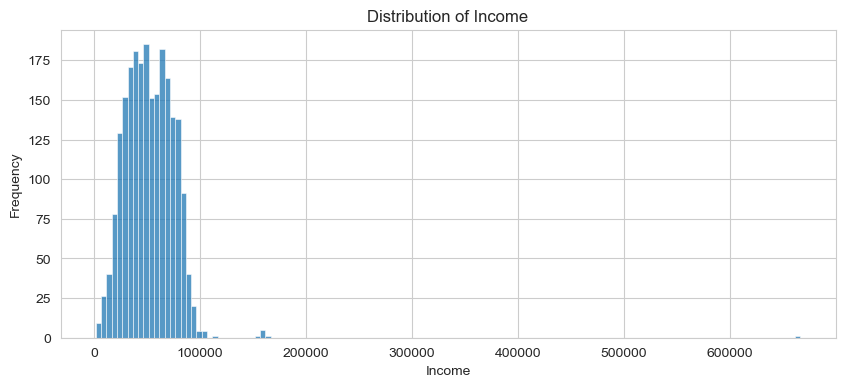

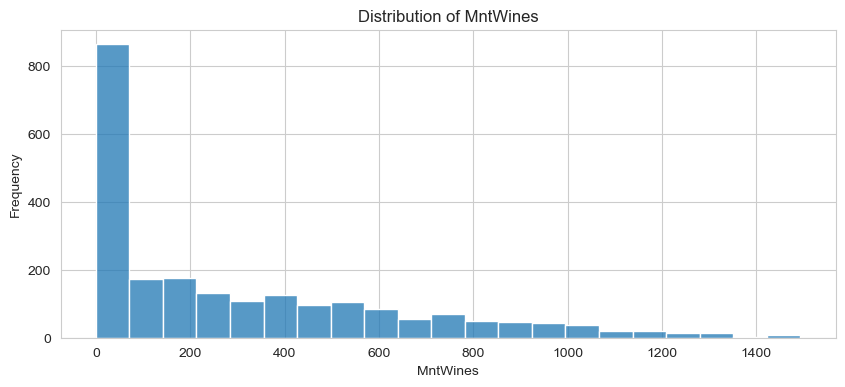

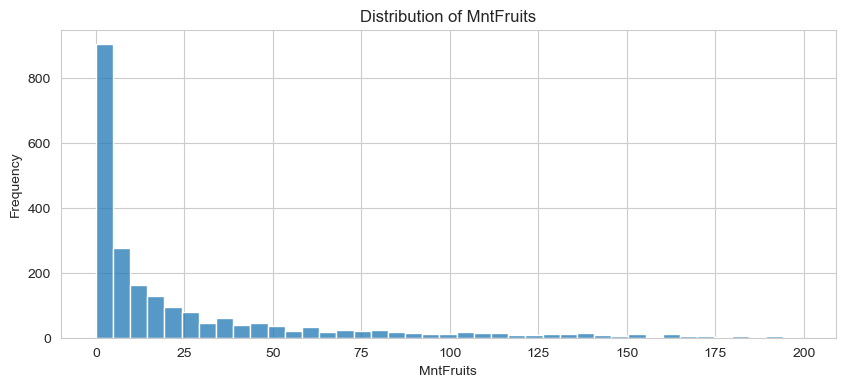

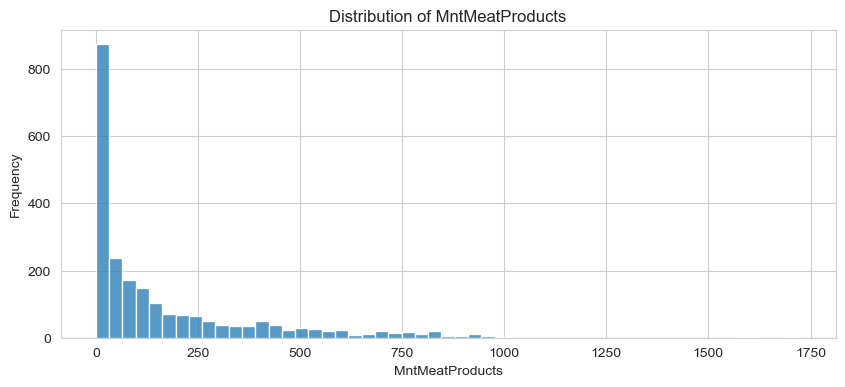

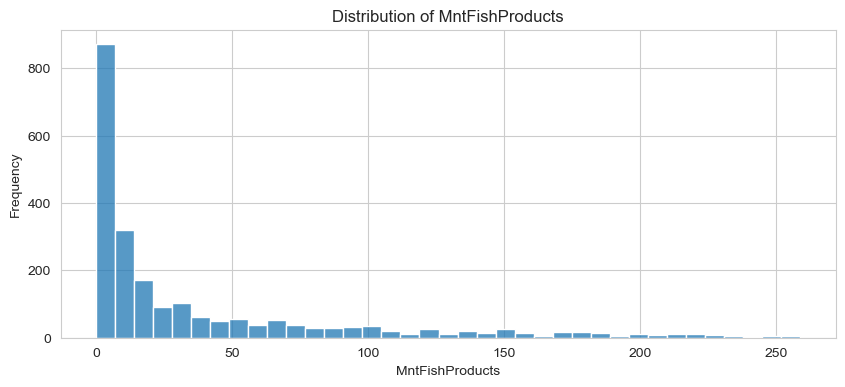

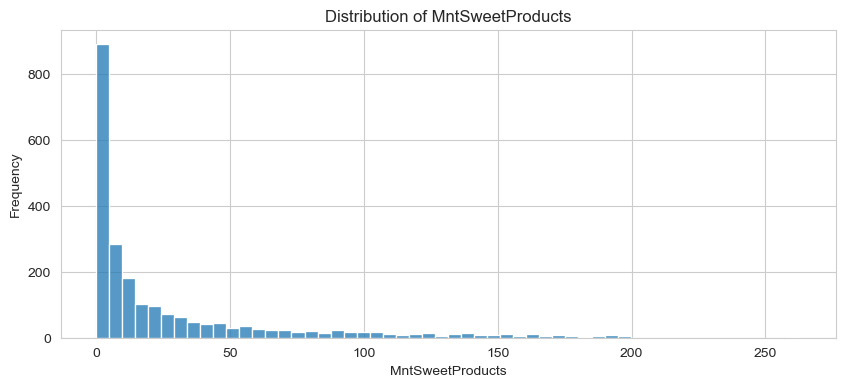

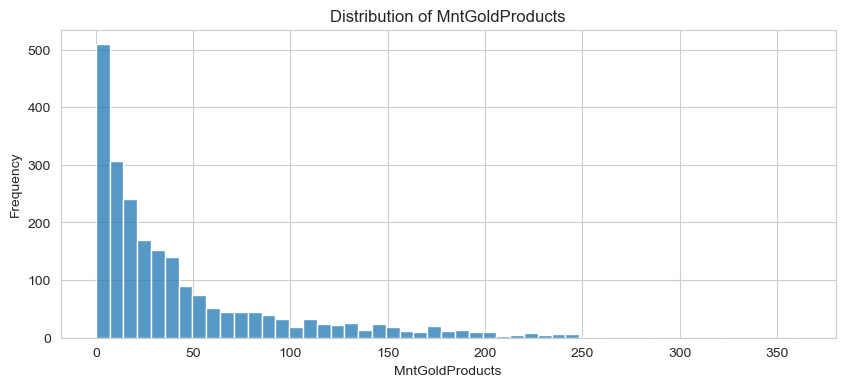

In [116]:

# Set the style of seaborn for the plots
sns.set_style("whitegrid")

# List of column names that you want to check distributions for
# Assuming 'MntWines', 'MntFruits', etc. are the spending categories
columns_to_plot = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

# Plotting the histograms using seaborn
for column in columns_to_plot:
    plt.figure(figsize=(10, 4))
    sns.histplot(marketing_data[column], kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



In [117]:
#Category breakdown: Analyze the distribution of categorical variables like 'Education', 'MaritalStatus', and 'Country'.

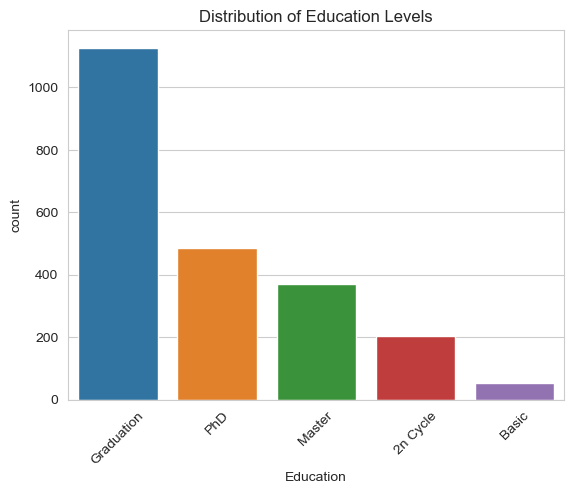

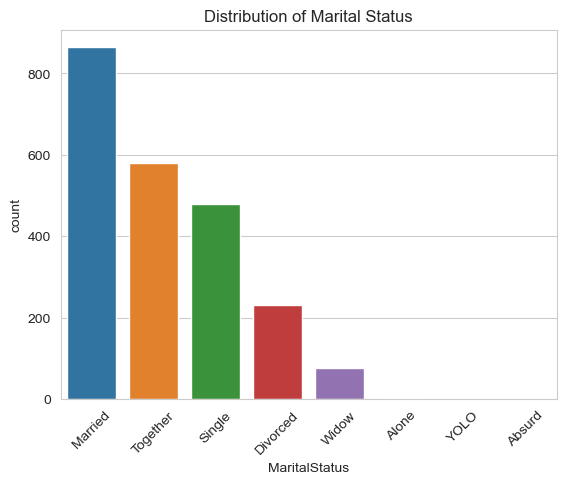

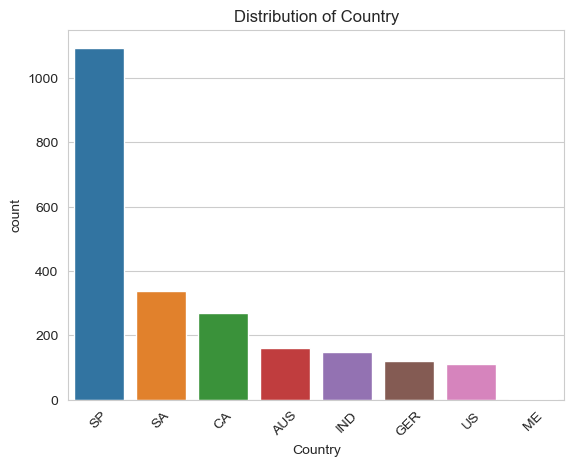

In [118]:

# Analyzing the distribution of 'Education' categories
sns.countplot(data=marketing_data, x='Education', order = marketing_data['Education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.show()

# Analyzing the distribution of 'MaritalStatus' categories
sns.countplot(data=marketing_data, x='MaritalStatus', order = marketing_data['MaritalStatus'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.show()

# Analyzing the distribution of 'Country' categories
sns.countplot(data=marketing_data, x='Country', order = marketing_data['Country'].value_counts().index)
plt.title('Distribution of Country')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.show()


In [119]:
#Time trends: Examine if there are any trends over time, based on 'DtCustomer', that could affect campaign performance.  

In [120]:
marketing_data.dtypes

id                              int64
YearBirth                       int64
Education                      object
MaritalStatus                  object
Income                        float64
Kidhome                         int64
Teenhome                        int64
DtCustomer             datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProducts                 int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

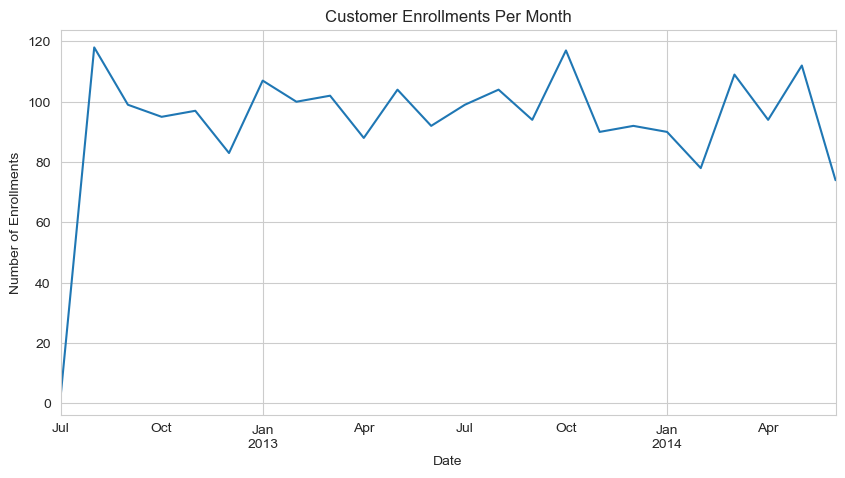

In [121]:
# Create a new DataFrame to count the number of customers enrolled per date
enrollments = marketing_data['DtCustomer'].value_counts().sort_index()

# Resample the enrollments by month and count the number of enrollments
monthly_enrollments = enrollments.resample('M').sum()

# Plot the data
plt.figure(figsize=(10, 5))
monthly_enrollments.plot(kind='line')

plt.title('Customer Enrollments Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Enrollments')
plt.grid(True)
plt.show()


In [122]:
#Feature engineering: You might want to create new features such as 'TotalSpent' which is a sum of all 'Mnt' columns, 'Age' from 'YearBirth', or 'FamilySize' from 'Kidhome' and 'Teenhome'. 

In [123]:
from datetime import datetime

# Create the 'TotalSpent' column as the sum of all 'Mnt' columns
mnt_columns = [col for col in marketing_data.columns if col.startswith('Mnt')]
marketing_data['TotalSpent'] = marketing_data[mnt_columns].sum(axis=1)

# Calculate 'Age' from 'YearBirth'
current_year = datetime.now().year
marketing_data['Age'] = current_year - marketing_data['YearBirth']

# Calculate 'FamilySize' from 'Kidhome' and 'Teenhome'
marketing_data['FamilySize'] = marketing_data['Kidhome'] + marketing_data['Teenhome'] + 1  # Assuming +1 for the parent/customer

# Optionally, if you need to save this DataFrame back into a CSV
marketing_data.to_csv('marketing_data_delphedits.csv', index=False)


In [124]:
marketing_data.describe(datetime_is_numeric=True, include = 'all')

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalSpent,Age,FamilySize
count,2240.000000,2240.000000,2240,2240,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SP,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,...,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN,605.798214,54.194196,1.950446
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.000000,27.000000,1.000000
25%,2828.250000,1959.000000,NaN,NaN,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,68.750000,46.000000,1.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,396.000000,53.000000,2.000000
75%,8427.750000,1977.000000,NaN,NaN,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1045.500000,64.000000,2.000000
max,11191.000000,1996.000000,NaN,NaN,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,2525.000000,130.000000,4.000000


In [125]:
#Binning the 'Income' into categories for easier analysis. 

In [126]:
# In the income column, there is an outlier way above the rest of the incomes. Let's remove it from the dataframe ! :

In [162]:
#If we want to remove only the single largest value:
marketing_data = marketing_data[marketing_data['Income'] != marketing_data['Income'].max()].copy()

In [128]:
marketing_data.describe(datetime_is_numeric=True, include = 'all')

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalSpent,Age,FamilySize
count,2239.000000,2239.000000,2239,2239,2239.000000,2239.000000,2239.000000,2239,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239,2239.000000,2239.000000,2239.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SP,NaN,NaN,NaN
freq,NaN,NaN,1126,864,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,NaN,NaN
mean,5590.444841,1968.802144,NaN,NaN,51963.554712,0.443948,0.506476,2013-07-10 10:26:25.350603008,49.121036,304.067441,...,0.074587,0.072800,0.064314,0.013399,0.149174,0.009379,NaN,606.041090,54.197856,1.950424
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.000000,27.000000,1.000000
25%,2827.500000,1959.000000,NaN,NaN,35533.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,69.000000,46.000000,1.000000
50%,5455.000000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,2013-07-09 00:00:00,49.000000,174.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,396.000000,53.000000,2.000000
75%,8423.500000,1977.000000,NaN,NaN,68277.500000,1.000000,1.000000,2013-12-30 12:00:00,74.000000,504.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1046.000000,64.000000,2.000000
max,11191.000000,1996.000000,NaN,NaN,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,2525.000000,130.000000,4.000000


In [129]:

# Define the income bins
income_bins = [0, 30000, 50000, 70000, 100000, 130000, 160000]

# Define the labels for the income bins
income_labels = ['0-30k', '30k-50k', '50k-70k', '70k-100k', '100k-130k', '130k-160k']

# Bin the 'Income' data
marketing_data['IncomeCategory'] = pd.cut(marketing_data['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

# Display the first few rows to confirm binning
print(marketing_data[['Income', 'IncomeCategory']].head(10))

marketing_data.head(10)

    Income IncomeCategory
0  84835.0       70k-100k
1  57091.0        50k-70k
2  67267.0        50k-70k
3  32474.0        30k-50k
4  21474.0          0-30k
5  71691.0       70k-100k
6  63564.0        50k-70k
7  44931.0        30k-50k
8  65324.0        50k-70k
9  65324.0        50k-70k


,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalSpent,Age,FamilySize,IncomeCategory
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,1190,53,1,70k-100k
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,577,62,1,50k-70k
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,251,65,2,50k-70k
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,11,56,3,30k-50k
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,91,34,2,0-30k
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,0,0,0,1,0,SP,1192,65,1,70k-100k
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,0,0,0,1,0,GER,1215,69,1,50k-70k
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,0,0,0,0,0,SP,96,56,2,30k-50k
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,0,0,0,0,0,US,544,69,2,50k-70k
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,0,0,0,0,0,IND,544,69,2,50k-70k


# 4. Data analysis

In [130]:
# Correlation analysis: Investigate the correlation between spending on various products and campaign acceptance. 

In [131]:

# Create a list of campaign columns assuming they start with 'AcceptedCmp'
campaign_cols = [col for col in marketing_data.columns if 'AcceptedCmp' in col]

# Include 'Response' column which might is the last campaign acceptance
campaign_cols.append('Response')

# Now, select the columns for the amount spent on different products
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

# Calculate correlation matrix for spending columns and campaign acceptance columns
correlation_matrix = marketing_data[spending_cols + campaign_cols].corr()

# Focus on the correlations with the campaign acceptance columns
campaign_correlations = correlation_matrix.loc[spending_cols, campaign_cols]

print(campaign_correlations)


                  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
MntWines              0.062104      0.373246      0.472593      0.354097   
MntFruits             0.014689      0.010113      0.215802      0.194719   
MntMeatProducts       0.018191      0.102840      0.373729      0.309718   
MntFishProducts       0.000290      0.016776      0.199527      0.260720   
MntSweetProducts      0.001451      0.028564      0.259539      0.241769   
MntGoldProducts       0.123027      0.022192      0.180963      0.166341   

                  AcceptedCmp2  Response  
MntWines              0.205897  0.247143  
MntFruits            -0.009790  0.125239  
MntMeatProducts       0.043003  0.236244  
MntFishProducts       0.002549  0.111241  
MntSweetProducts      0.009953  0.117269  
MntGoldProducts       0.049963  0.139753  


In the context of this data analysis, we are interested in how the spending on various products (like wines, fruits, meat, etc.) correlates with the acceptance of different marketing campaigns.

 - Values between 0 and 0.3 (or -0.3): indicate a weak positive (or negative) linear relationship through a shaky linear rule.  

 - Values between 0.3 and 0.7 (or -0.3 and -0.7): indicate a moderate positive (or negative) linear relationship through a firm linear rule.  

 - Values between 0.7 and 1.0 (or -0.7 and -1.0): indicate a strong positive (or negative) linear relationship through a very firm linear rule.

So, if there is a high positive correlation coefficient between MntWines and AcceptedCmp1, for example, it suggests that customers who spend more on wines are more likely to have accepted Campaign 1. On the other hand, a high negative correlation would suggest that the more they spend on wines, the less likely they are to accept the campaign. A near-zero correlation would mean there's no linear relationship between the spending on wines and the acceptance of Campaign 1.

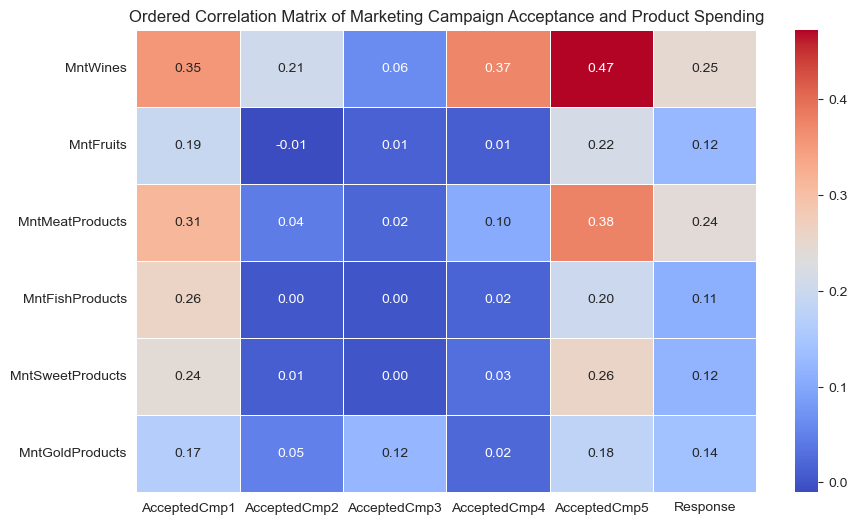

In [132]:
# Our correlation matrix data as a Python dictionary
data = {
    "AcceptedCmp3": [0.061856, 0.014500, 0.019010, 0.000079, 0.001217, 0.122797],
    "AcceptedCmp4": [0.373122, 0.009921, 0.104487, 0.016567, 0.028335, 0.021915],
    "AcceptedCmp5": [0.472513, 0.215664, 0.377991, 0.199371, 0.259386, 0.180758],
    "AcceptedCmp1": [0.353984, 0.194587, 0.313317, 0.260593, 0.241624, 0.166147],
    "AcceptedCmp2": [0.205859, -0.009871, 0.043685, 0.002462, 0.009858, 0.049864],
    "Response": [0.246852, 0.124991, 0.239507, 0.110965, 0.116963, 0.139398]
}

# The row labels (index) for the DataFrame
products = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProducts"]

# Create a DataFrame
correlation_matrix = pd.DataFrame(data, index=products)

# Let's rearrange the columns manually to the desired order.
ordered_columns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]

# Reindex the DataFrame with the new column order
ordered_correlation_matrix = correlation_matrix.reindex(columns=ordered_columns)

# Now we plot the heatmap with the ordered DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(ordered_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Ordered Correlation Matrix of Marketing Campaign Acceptance and Product Spending')
plt.show()


In [133]:
# ANOVA/test of means: See if there are significant differences in spending based on categories like 'Education' or 'MaritalStatus'.

In [144]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Conduct ANOVA for each spending category based on 'Education'
categories = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
anova_results_education = {}
anova_results_marital = {}

for category in categories:
    # ANOVA for 'Education'
    anova_education = ols(f'{category} ~ C(Education)', data=marketing_data).fit()
    anova_table_education = sm.stats.anova_lm(anova_education, typ=2)
    anova_results_education[category] = anova_table_education
    
    # ANOVA for 'MaritalStatus'
    anova_marital = ols(f'{category} ~ C(MaritalStatus)', data=marketing_data).fit()
    anova_table_marital = sm.stats.anova_lm(anova_marital, typ=2)
    anova_results_marital[category] = anova_table_marital

# Display the ANOVA tables for 'Education'
print('ANOVA Tables for Education:')
for category, anova_table in anova_results_education.items():
    print(f"\n{category}:")
    print(anova_table)

# Display the ANOVA tables for 'MaritalStatus'
print('\nANOVA Tables for MaritalStatus:')
for category, anova_table in anova_results_marital.items():
    print(f"\n{category}:")
    print(anova_table)


ANOVA Tables for Education:

MntFruits:
                    sum_sq      df          F        PR(>F)
C(Education)  6.355939e+04     4.0  10.205767  3.455871e-08
Residual      3.478222e+06  2234.0        NaN           NaN

MntMeatProducts:
                    sum_sq      df         F    PR(>F)
C(Education)  1.626987e+06     4.0  8.082684  0.000002
Residual      1.124221e+08  2234.0       NaN       NaN

MntFishProducts:
                    sum_sq      df          F        PR(>F)
C(Education)  1.463184e+05     4.0  12.505341  4.610282e-10
Residual      6.534714e+06  2234.0        NaN           NaN

MntSweetProducts:
                    sum_sq      df          F        PR(>F)
C(Education)  7.925252e+04     4.0  11.849152  1.583207e-09
Residual      3.735502e+06  2234.0        NaN           NaN

MntGoldProducts:
                    sum_sq      df          F        PR(>F)
C(Education)  1.499234e+05     4.0  14.090743  2.330466e-11
Residual      5.942359e+06  2234.0        NaN           NaN

A

In all cases, the low p-values suggest that education level does affect spending habits for these categories of products. This information could be very valuable for targeted marketing campaigns. _However, the actual difference between the groups (i.e., which groups are spending more or less) is not indicated by the ANOVA itself. For that, post-hoc tests such as Tukey's HSD would need to be conducted to identify where the differences lie._

However, for most product categories, marital status does not seem to significantly affect spending habits, with the exception of fish and gold products, where there are significant differences.

# 5. Hypothesis Testing  

In [145]:
#Campaign success factors: Test hypotheses about what factors lead to successful campaign responses. 

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [147]:
marketing_data_2 = pd.read_csv('marketing_data_delphedits.csv')

In [163]:
# Logistic Regression 
# Define the preprocessing for numerical columns (you can add scaling, normalization, etc.)
numeric_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'TotalSpent', 'Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define the preprocessing for categorical columns
categorical_features = ['Education', 'MaritalStatus', 'Country']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the pipeline with preprocessor and logistic regression estimator
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Split the data into features and target variable
X = marketing_data_2.drop('Response', axis=1)  # Assuming 'Response' is your target variable
y = marketing_data_2['Response']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the response on the test data
y_pred = pipeline.predict(X_test)

# Evaluation metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       376
           1       0.59      0.24      0.34        72

    accuracy                           0.85       448
   macro avg       0.73      0.60      0.63       448
weighted avg       0.82      0.85      0.82       448

Confusion Matrix:
 [[364  12]
 [ 55  17]]
Accuracy: 0.8504464285714286


The results indicate the performance of the logistic regression model on the test set. Here's a summary of the performance metrics:

Precision: The precision for predicting class 0 (no response) is high at 87%, meaning the model is good at not labeling a non-respondent as a respondent. However, the precision for class 1 (response) is significantly lower at 59%, suggesting that when the model predicts a respondent, it is correct only about 59% of the time.

Recall: The recall for class 0 is very high at 97%, indicating the model is able to identify most of the non-respondents correctly. The recall for class 1 is low at 24%, meaning it misses a lot of actual respondents.

F1-Score: The F1-score for class 0 is 92%, showing a good balance between precision and recall. For class 1, the F1-score is 34%, which is low, indicating that the model is not as effective in identifying respondents.

Support: The support shows the number of actual occurrences of the class in the specified dataset, with 376 for class 0 and 72 for class 1.

Accuracy: The overall accuracy of the model is 85%, which means that the model correctly predicts the response for 85% of the cases in the test set.

Confusion Matrix: The confusion matrix provides a detailed breakdown of the correct and incorrect classifications:
True negatives (TN): 364 (actual non-respondents predicted as non-respondents)
False positives (FP): 12 (actual non-respondents predicted as respondents)
False negatives (FN): 55 (actual respondents predicted as non-respondents)
True positives (TP): 17 (actual respondents predicted as respondents)

The model is performing well in terms of overall accuracy and is particularly strong at identifying non-respondents. However, it struggles with correctly identifying respondents, as seen by the low recall and F1-score for class 1. This imbalance could be due to a class imbalance in the dataset, where there are fewer respondents than non-respondents, or it could be that the model needs to be improved to better capture the characteristics of respondents, possibly through feature engineering, using a different model, or applying techniques to address class imbalance such as SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights in the logistic regression.

To interpret the factors that lead to successful campaign responses, we typically look at the coefficients of the logistic regression model, as they indicate the importance and direction of each feature's relationship with the likelihood of a positive response (i.e., a customer responding to the campaign).



In [149]:
# Coefficients of the logistic regression model
# Convert 'DtCustomer' to datetime and extract year, month, and day as separate features
marketing_data_2['DtCustomer'] = pd.to_datetime(marketing_data_2['DtCustomer'])
marketing_data_2['Year'] = marketing_data_2['DtCustomer'].dt.year
marketing_data_2['Month'] = marketing_data_2['DtCustomer'].dt.month
marketing_data_2['Day'] = marketing_data_2['DtCustomer'].dt.day

# Now drop the original 'DtCustomer' column
marketing_data_2 = marketing_data_2.drop('DtCustomer', axis=1)

# Proceed with one-hot encoding for other categorical variables
data_encoded = pd.get_dummies(marketing_data_2, columns=['Education', 'MaritalStatus', 'Country'], drop_first=True)

# Split data into predictors (X) and target (y)
X = data_encoded.drop('Response', axis=1)
y = data_encoded['Response']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the logistic regression model
model = LogisticRegression(max_iter=8000, solver='saga')
model.fit(X, y)

# Retrieve and display coefficients
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(feature_importance.sort_values(by='Coefficient', ascending=False))


                   Feature   Coefficient
23              TotalSpent  7.721977e-04
6                 MntWines  4.119731e-04
8          MntMeatProducts  2.932544e-04
11         MntGoldProducts  3.714854e-05
7                MntFruits  1.436088e-05
10        MntSweetProducts  1.129451e-05
9          MntFishProducts  4.166275e-06
14     NumCatalogPurchases  3.698172e-06
13         NumWebPurchases  1.897501e-06
19            AcceptedCmp5  8.882882e-07
17            AcceptedCmp3  8.701956e-07
20            AcceptedCmp1  7.840590e-07
16       NumWebVisitsMonth  7.195605e-07
36    MaritalStatus_Single  5.427026e-07
18            AcceptedCmp4  4.744642e-07
32           Education_PhD  3.813397e-07
21            AcceptedCmp2  2.317111e-07
34  MaritalStatus_Divorced  2.048540e-07
38     MaritalStatus_Widow  1.135101e-07
45              Country_SP  7.397935e-08
43              Country_ME  2.555228e-08
39      MaritalStatus_YOLO  1.291460e-08
33     MaritalStatus_Alone  1.019138e-08
22              

Positive Coefficients  

Positive coefficients increase the likelihood of a successful campaign response when the feature value increases.

TotalSpent: The largest positive coefficient. More total spending is strongly associated with a successful response.
MntWines, MntMeatProducts: Higher spending on wines and meat products also positively influences campaign success.
MntGoldProducts, MntFruits, MntSweetProducts, MntFishProducts: Smaller positive coefficients, but still indicative that spending in these categories is positively associated with campaign success.  
NumCatalogPurchases, NumWebPurchases: The number of purchases made through catalogs and the web contributes positively, though the impact is smaller.  
AcceptedCmp5, AcceptedCmp3, AcceptedCmp1: Acceptance of these particular campaigns correlates positively with the overall campaign success.  
Demographics and Geographic Features: Certain demographic and geographic characteristics (like being single, having a PhD, or being from specific countries) have a smaller, but positive impact.  

Negative Coefficients  

Negative coefficients decrease the likelihood of a successful campaign response when the feature value increases.

Recency: A very high negative coefficient. Recent interactions (lower recency values) are much more likely to lead to a successful response.  
Age, YearBirth: Older age and earlier birth year are negatively associated with campaign success.
**

In [150]:
#Customer profile for high value: Identify the profile of high-spending customers.  


In [151]:
# Define high spenders as the top 25% of 'TotalSpent'
high_spender_threshold = marketing_data_2['TotalSpent'].quantile(0.75)
high_spenders = marketing_data_2[marketing_data_2['TotalSpent'] >= high_spender_threshold]

In [168]:
high_spenders.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Response,Complain,Country,TotalSpent,Age,FamilySize,Year,Month,Day
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,1,0,SP,1190,53,1,2014,6,16
5,7348,1958,PhD,Single,71691.0,0,0,0,336,130,...,0,1,0,SP,1192,65,1,2014,3,17
6,4073,1954,2n Cycle,Married,63564.0,0,0,0,769,80,...,0,1,0,GER,1215,69,1,2014,1,29
10,2079,1947,2n Cycle,Married,81044.0,0,0,0,450,26,...,0,0,0,US,1208,76,1,2013,12,27
12,10530,1959,PhD,Widow,67786.0,0,0,0,431,82,...,0,1,0,IND,1156,64,1,2013,12,7


In [170]:
high_spenders.describe(include = 'all')

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Response,Complain,Country,TotalSpent,Age,FamilySize,Year,Month,Day
count,560.000000,560.000000,560,560,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,...,560.000000,560.000000,560.000000,560,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
unique,NaN,NaN,4,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,293,201,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,274,NaN,NaN,NaN,NaN,NaN,NaN
mean,5593.157143,1967.889286,NaN,NaN,75067.785714,0.062500,0.316071,49.951786,739.273214,62.110714,...,0.042857,0.300000,0.003571,NaN,1490.475000,55.110714,1.378571,2012.883929,6.764286,15.580357
std,3160.795687,13.056444,NaN,NaN,12414.754250,0.242278,0.498756,29.066628,303.073555,50.207497,...,0.202716,0.458667,0.059708,NaN,329.310424,13.056444,0.588718,0.689112,3.515080,8.816798
min,0.000000,1899.000000,NaN,NaN,2447.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,1047.000000,28.000000,1.000000,2012.000000,1.000000,1.000000
25%,2921.750000,1958.000000,NaN,NaN,68015.500000,0.000000,0.000000,25.000000,507.750000,21.750000,...,0.000000,0.000000,0.000000,NaN,1198.000000,46.000000,1.000000,2012.000000,4.000000,8.000000
50%,5430.000000,1969.000000,NaN,NaN,75243.500000,0.000000,0.000000,53.000000,736.500000,50.000000,...,0.000000,0.000000,0.000000,NaN,1440.000000,54.000000,1.000000,2013.000000,7.500000,16.000000
75%,8439.000000,1977.000000,NaN,NaN,81984.750000,0.000000,1.000000,74.250000,962.000000,93.000000,...,0.000000,1.000000,0.000000,NaN,1691.500000,65.000000,2.000000,2013.000000,10.000000,23.000000


In [153]:
#Analyse High spenders 
# Demographics
avg_age = high_spenders['Age'].mean()
avg_income = high_spenders['Income'].mean()
common_education = high_spenders['Education'].mode()[0]
common_marital_status = high_spenders['MaritalStatus'].mode()[0]

# Spending in different categories
avg_wines = high_spenders['MntWines'].mean()
avg_fruits = high_spenders['MntFruits'].mean()
avg_meat = high_spenders['MntMeatProducts'].mean()

# Engagement with campaigns
campaign_success_rate = high_spenders[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()

# Print the results
print(f"Average Age: {avg_age}")
print(f"Average Income: {avg_income}")
print(f"Most Common Education: {common_education}")
print(f"Most Common Marital Status: {common_marital_status}")
print(f"Average Spending on Wines: {avg_wines}")
print(f"Average Spending on Fruits: {avg_fruits}")
print(f"Average Spending on Meat: {avg_meat}")
print("Campaign Success Rate:")
print(campaign_success_rate)


Average Age: 55.11071428571429
Average Income: 75067.78571428571
Most Common Education: Graduation
Most Common Marital Status: Married
Average Spending on Wines: 739.2732142857143
Average Spending on Fruits: 62.11071428571429
Average Spending on Meat: 456.79464285714283
Campaign Success Rate:
AcceptedCmp1    0.200000
AcceptedCmp2    0.042857
AcceptedCmp3    0.092857
AcceptedCmp4    0.164286
AcceptedCmp5    0.267857
Response        0.300000
dtype: float64


# 7. Data Interpretation  

Which customer demographic characteristics correlate with higher spending or campaign acceptance?

  
Target Audience: Focus marketing efforts on middle-aged, married individuals, especially those with a background in graduation, as they are more likely to be high spenders.  

Product Focus: Emphasize wines and meat products in marketing materials, as these are the categories where high spenders are spending the most.   

Campaign Design: Consider designing campaigns similar to 'AcceptedCmp5', which had the highest success rate among high spenders. Also, the overall positive response rate indicates that high spenders are receptive to campaigns, so engaging them with well-crafted marketing could be very effective.  

These insights can guide more targeted and effective marketing strategies aimed at the segment of customers most likely to generate higher revenue.



# 8. Reporting  



In [99]:
# Visualizations: Create charts and graphs that clearly show the results of your analysis.


**Demographic of High Spenders**

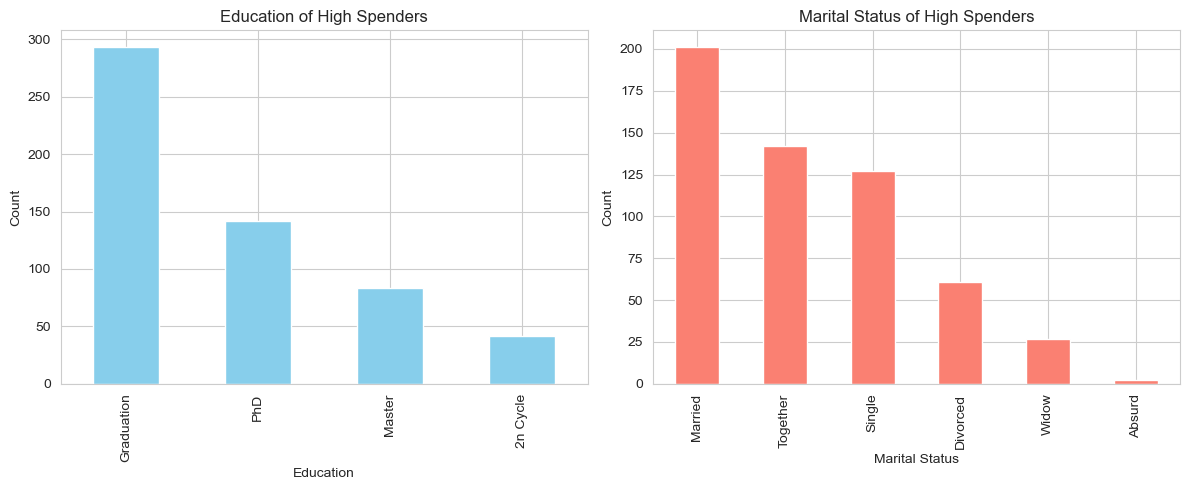

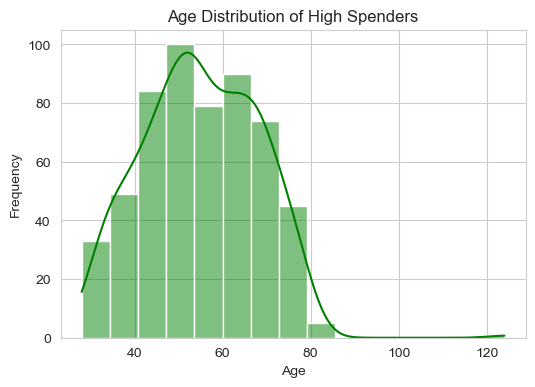

In [171]:

# high_spenders is our DataFrame of high spending customers

# Education and Marital Status Bar Charts
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
high_spenders['Education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Education of High Spenders')
plt.xlabel('Education')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
high_spenders['MaritalStatus'].value_counts().plot(kind='bar', color='salmon')
plt.title('Marital Status of High Spenders')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Age Distribution Histogram
plt.figure(figsize=(6, 4))
sns.histplot(high_spenders['Age'], bins=15, kde=True, color='green')
plt.title('Age Distribution of High Spenders')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Spending Habits**

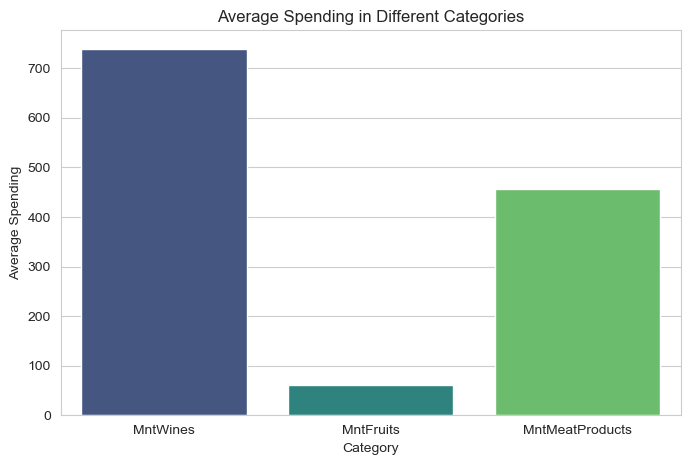

In [156]:
# Average spending in different categories
categories = ['MntWines', 'MntFruits', 'MntMeatProducts']
averages = [high_spenders[cat].mean() for cat in categories]

plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=averages, palette='viridis')
plt.title('Average Spending in Different Categories')
plt.xlabel('Category')
plt.ylabel('Average Spending')
plt.show()


**Campaign Success Rates**

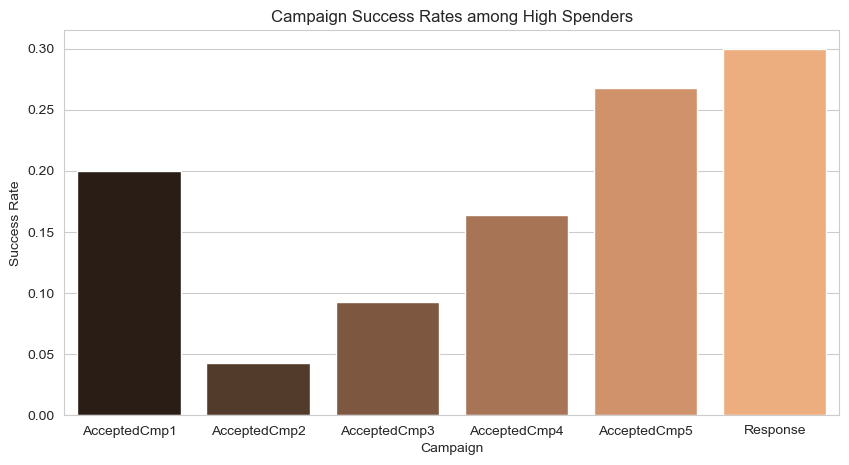

In [157]:
# Campaign success rates
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
success_rates = high_spenders[campaigns].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=campaigns, y=success_rates, palette='copper')
plt.title('Campaign Success Rates among High Spenders')
plt.xlabel('Campaign')
plt.ylabel('Success Rate')
plt.show()
